# D-Tension: Youth Detention and Spending in the Northern Territory

The Northern Territory faces many unique challenges within Australia.  The remoteness, sparseness, and high cost of living combined with cultural tensions create tough situations.  One issue especially affecting Alice Springs is youth crime.  To better understand this, *Slacking NT* decided to study youth detention and other statistics across Australia.  While we could have written an app, we wanted to highlight some grave statistics relevant to all Territorians.

## Youth Detention Analysis in Python with Pandas

To analyse this data, we're going to do simple plots.  We will show how the NT has a much higher youth detention rate than other states across the time period 2008-2016.  The provided youth detention data contains absolute numbers for each quarter.  To convert this to a rate, we also downloaded the population from the Census for each state or territory for the relevant years, using the same population across all quarters within a year.

The code to make this happen is below.  It's simple Python using the data munging library, "Pandas", as well as the plotting library, `matplotlib`.

In [1]:
import csv
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
plt.ion()

In [3]:
plt.style.use('ggplot')

In [4]:
fname = 'youth-justice-detention-data-2017.csv'
rawdata = pd.read_csv(fname)

In [5]:
data = rawdata[rawdata['state'] != 'Aust'].copy()

In [6]:
data['STATE'] = [r.upper() for r in data['state']]

In [7]:
data.loc[:,['STATE','quarter','avg_nightly_pop']].head()

,STATE,quarter,avg_nightly_pop
0,NSW,Jun qtr 2008,202
1,NSW,Sep qtr 2008,197
2,NSW,Dec qtr 2008,196
3,NSW,Mar qtr 2009,177
4,NSW,Jun qtr 2009,166


In [8]:
states = sorted(set(data['STATE']))
s_index = {s:i for s,i in zip(states,np.arange(len(states)))}
qrtrs = sorted(set(data['quarter']))

In [9]:
import datetime

In [10]:
dqrtrs = [datetime.datetime.strptime(q, '%b qtr %Y') for q in qrtrs]
D = {q:d for d,q in zip(dqrtrs,qrtrs)}


In [11]:
dqrtrs = sorted(dqrtrs)
d_index = {d:i for d,i in zip(dqrtrs,np.arange(len(dqrtrs)))}

In [12]:
heat = np.zeros((len(dqrtrs),len(states)))

In [13]:
print(data[:2])
data.loc[1265]

     agegrp indig_status legal_status   sex state       quarter quart  year  \
0  10 to 17        Total  Unsentenced  Male   NSW  Jun qtr 2008   Jun  2008   
1  10 to 17        Total  Unsentenced  Male   NSW  Sep qtr 2008   Sep  2008   

   avg_nightly_pop STATE  
0              202   NSW  
1              197   NSW  


agegrp                 10 to 17
indig_status              Total
legal_status          Sentenced
sex                        Male
state                       Qld
quarter            Mar qtr 2011
quart                       Mar
year                       2011
avg_nightly_pop              38
STATE                       QLD
Name: 1265, dtype: object

In [14]:
for r in range(len(data)):
    # location indices are still based on original dataframe
    try:
        row = data.loc[r]
    except KeyError:
        continue
    if r % 5000 == 0:
        print(r)
    heat[d_index[D[row['quarter']]],s_index[row['STATE']]] += row['avg_nightly_pop']

0


5000


10000


15000


20000


25000


30000


35000


In [15]:
# State and Territory populations from over time
pfile = 'oz_pop.csv'
pops = pd.read_csv(pfile)
pops_arr = np.array(pops[states])

In [16]:
#pops_arr[10:]
pops_qrts = np.zeros(heat.shape)
pops_qrts[0] = pops_arr[10]
pops_qrts[1] = pops_arr[10]
pops_qrts[2] = pops_arr[10]
for i,year in enumerate(pops_arr[11:-1]):
    pops_qrts[4*i+3] = year
    pops_qrts[4*i+4] = year
    pops_qrts[4*i+5] = year
    pops_qrts[4*i+6] = year
pops_qrts[-2] = pops_arr[-1]
pops_qrts[-1] = pops_arr[-1]

In [17]:
heat_norm = heat/pops_qrts

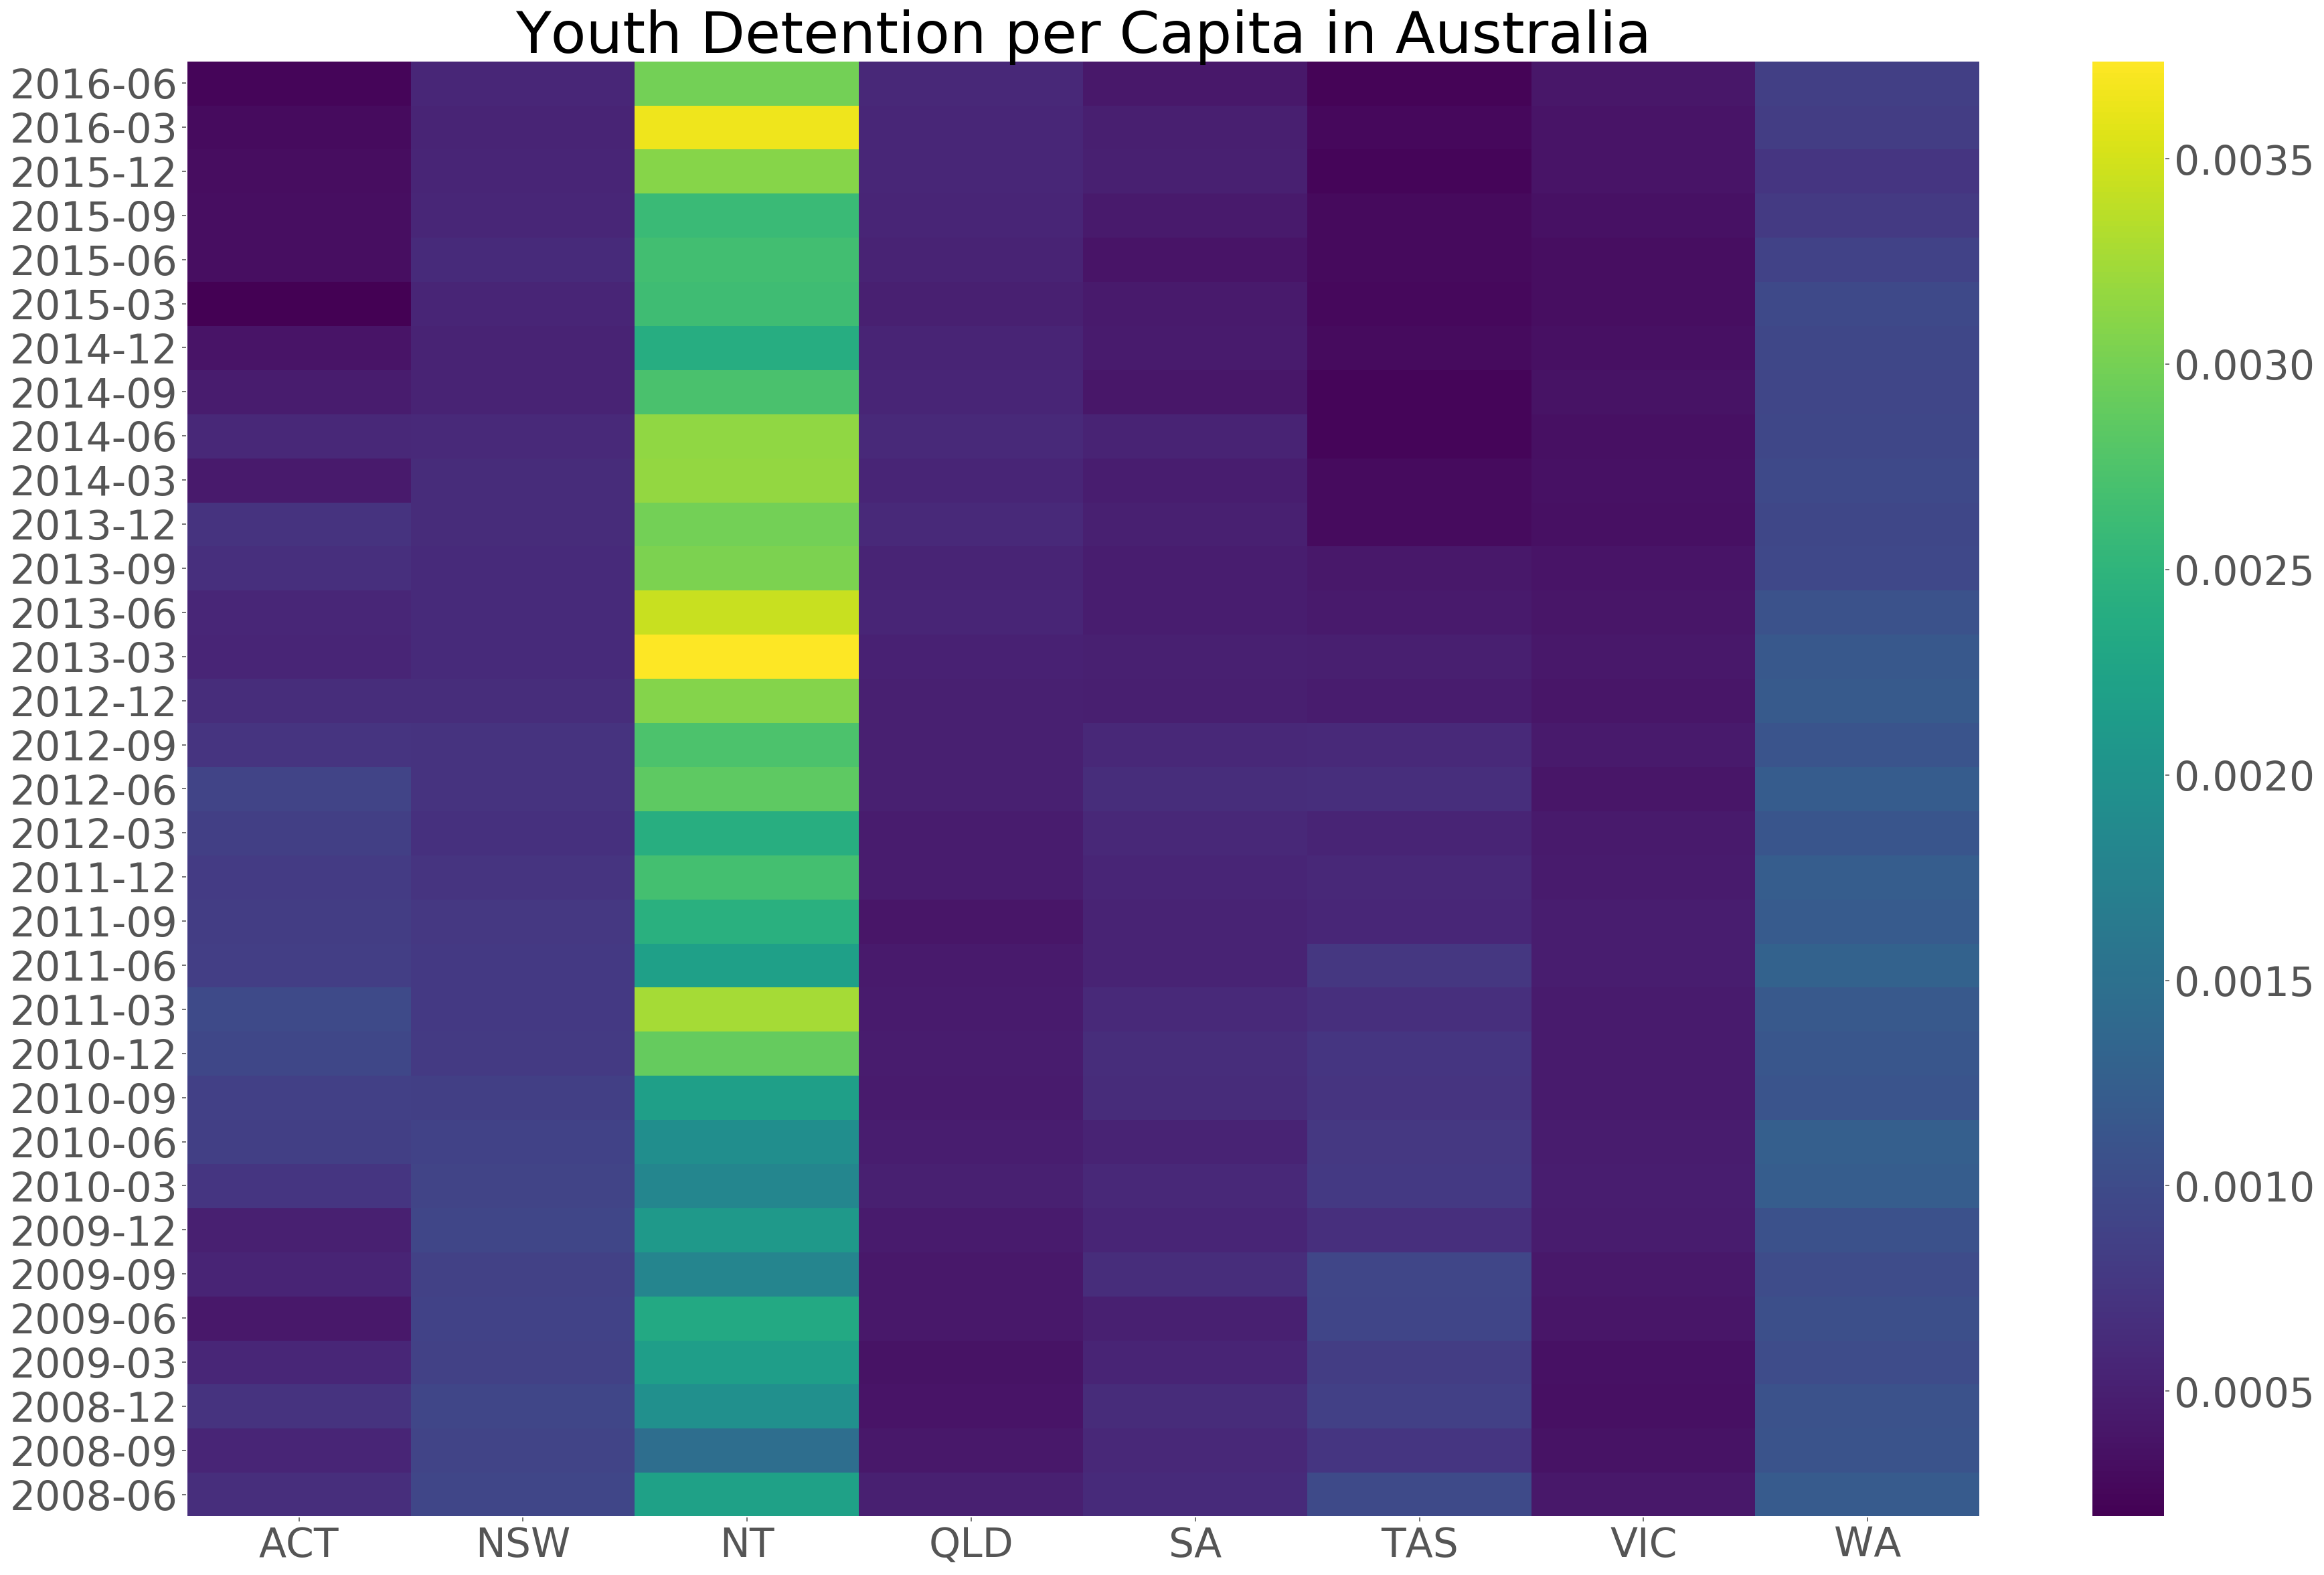

In [18]:
plt.rcParams['figure.figsize'] = (30,20)
plt.rcParams['font.size'] = 30
plt.pcolor(heat_norm)
plt.yticks(np.arange(0.5, len(dqrtrs), 1), [str(d)[:7] for d in dqrtrs])
plt.xticks(np.arange(0.5, len(states), 1), states)
plt.colorbar()
plt.title('Youth Detention per Capita in Australia')
plt.show()

This heatplot clearly shows that the NT faces a higher youth detention rate than other states.  While it has varied over the years, NT's rate is consistently above the rest.  We don't go into reasons why this is, but we want to open the discussion that this is an issue.

## Health Spending in Australia

One simple way to tackle any social problem is to throw money at it.  This has been tried across many categories in the NT; we're going to highlight health spending as an example.  Similar to youth detention, we will see that the health spending rate is much higher in the NT than other states.  Remoteness and isolation take their toll.

The health expenditure data is tabulated for each state for each year 1998-2011.  While this only gives us a four year overlap with the youth detention data, it's still worth studying.

In [19]:
# Add in health expenditure data
hname = 'healthexpenditurebyareaandsource.csv'
# there's a bunch of extra rows
hrawdata = pd.read_csv(hname)
hrawdata = hrawdata.dropna()

In [20]:
sorted(set(hrawdata['state']))

['ACT', 'NSW', 'NT', 'QLD', 'SA', 'TAS', 'VIC', 'WA']

In [21]:
# Convert financial year to calendar year
hrawdata['year'] = [datetime.datetime.strptime(s[:4],'%Y') for s in hrawdata['financial_year']]

In [22]:
hyears = sorted(set(hrawdata['year']))
hy_index = {hy:i for i,hy in enumerate(hyears)}

In [23]:
hheat = np.zeros((len(hyears),len(states)))

In [24]:
hrawdata.head()

,financial_year,state,area_of_expenditure,broad_source_of_funding,detailed_source_of_funding,real_expenditure_millions,year
0,1997-98,NSW,Administration,Government,Australian Government,315.0,1997-01-01
1,1997-98,NSW,Administration,Government,State and local,120.0,1997-01-01
2,1997-98,NSW,Administration,Non-government,Private health insurance funds,314.0,1997-01-01
3,1997-98,NSW,Aids and appliances,Government,Australian Government,65.0,1997-01-01
4,1997-98,NSW,Aids and appliances,Non-government,Individuals,168.0,1997-01-01


In [25]:
for r in range(len(hrawdata)):
    # location indices are still based on original dataframe
    try:
        row = hrawdata.loc[r]
    except KeyError:
        continue
    if r % 1000 == 0:
        print(r)
    hheat[hy_index[row['year']],s_index[row['state']]] += row['real_expenditure_millions']

0


1000
2000


3000
4000


5000
6000


In [26]:
hheat_norm = hheat/pops_arr[:hheat.shape[0]]

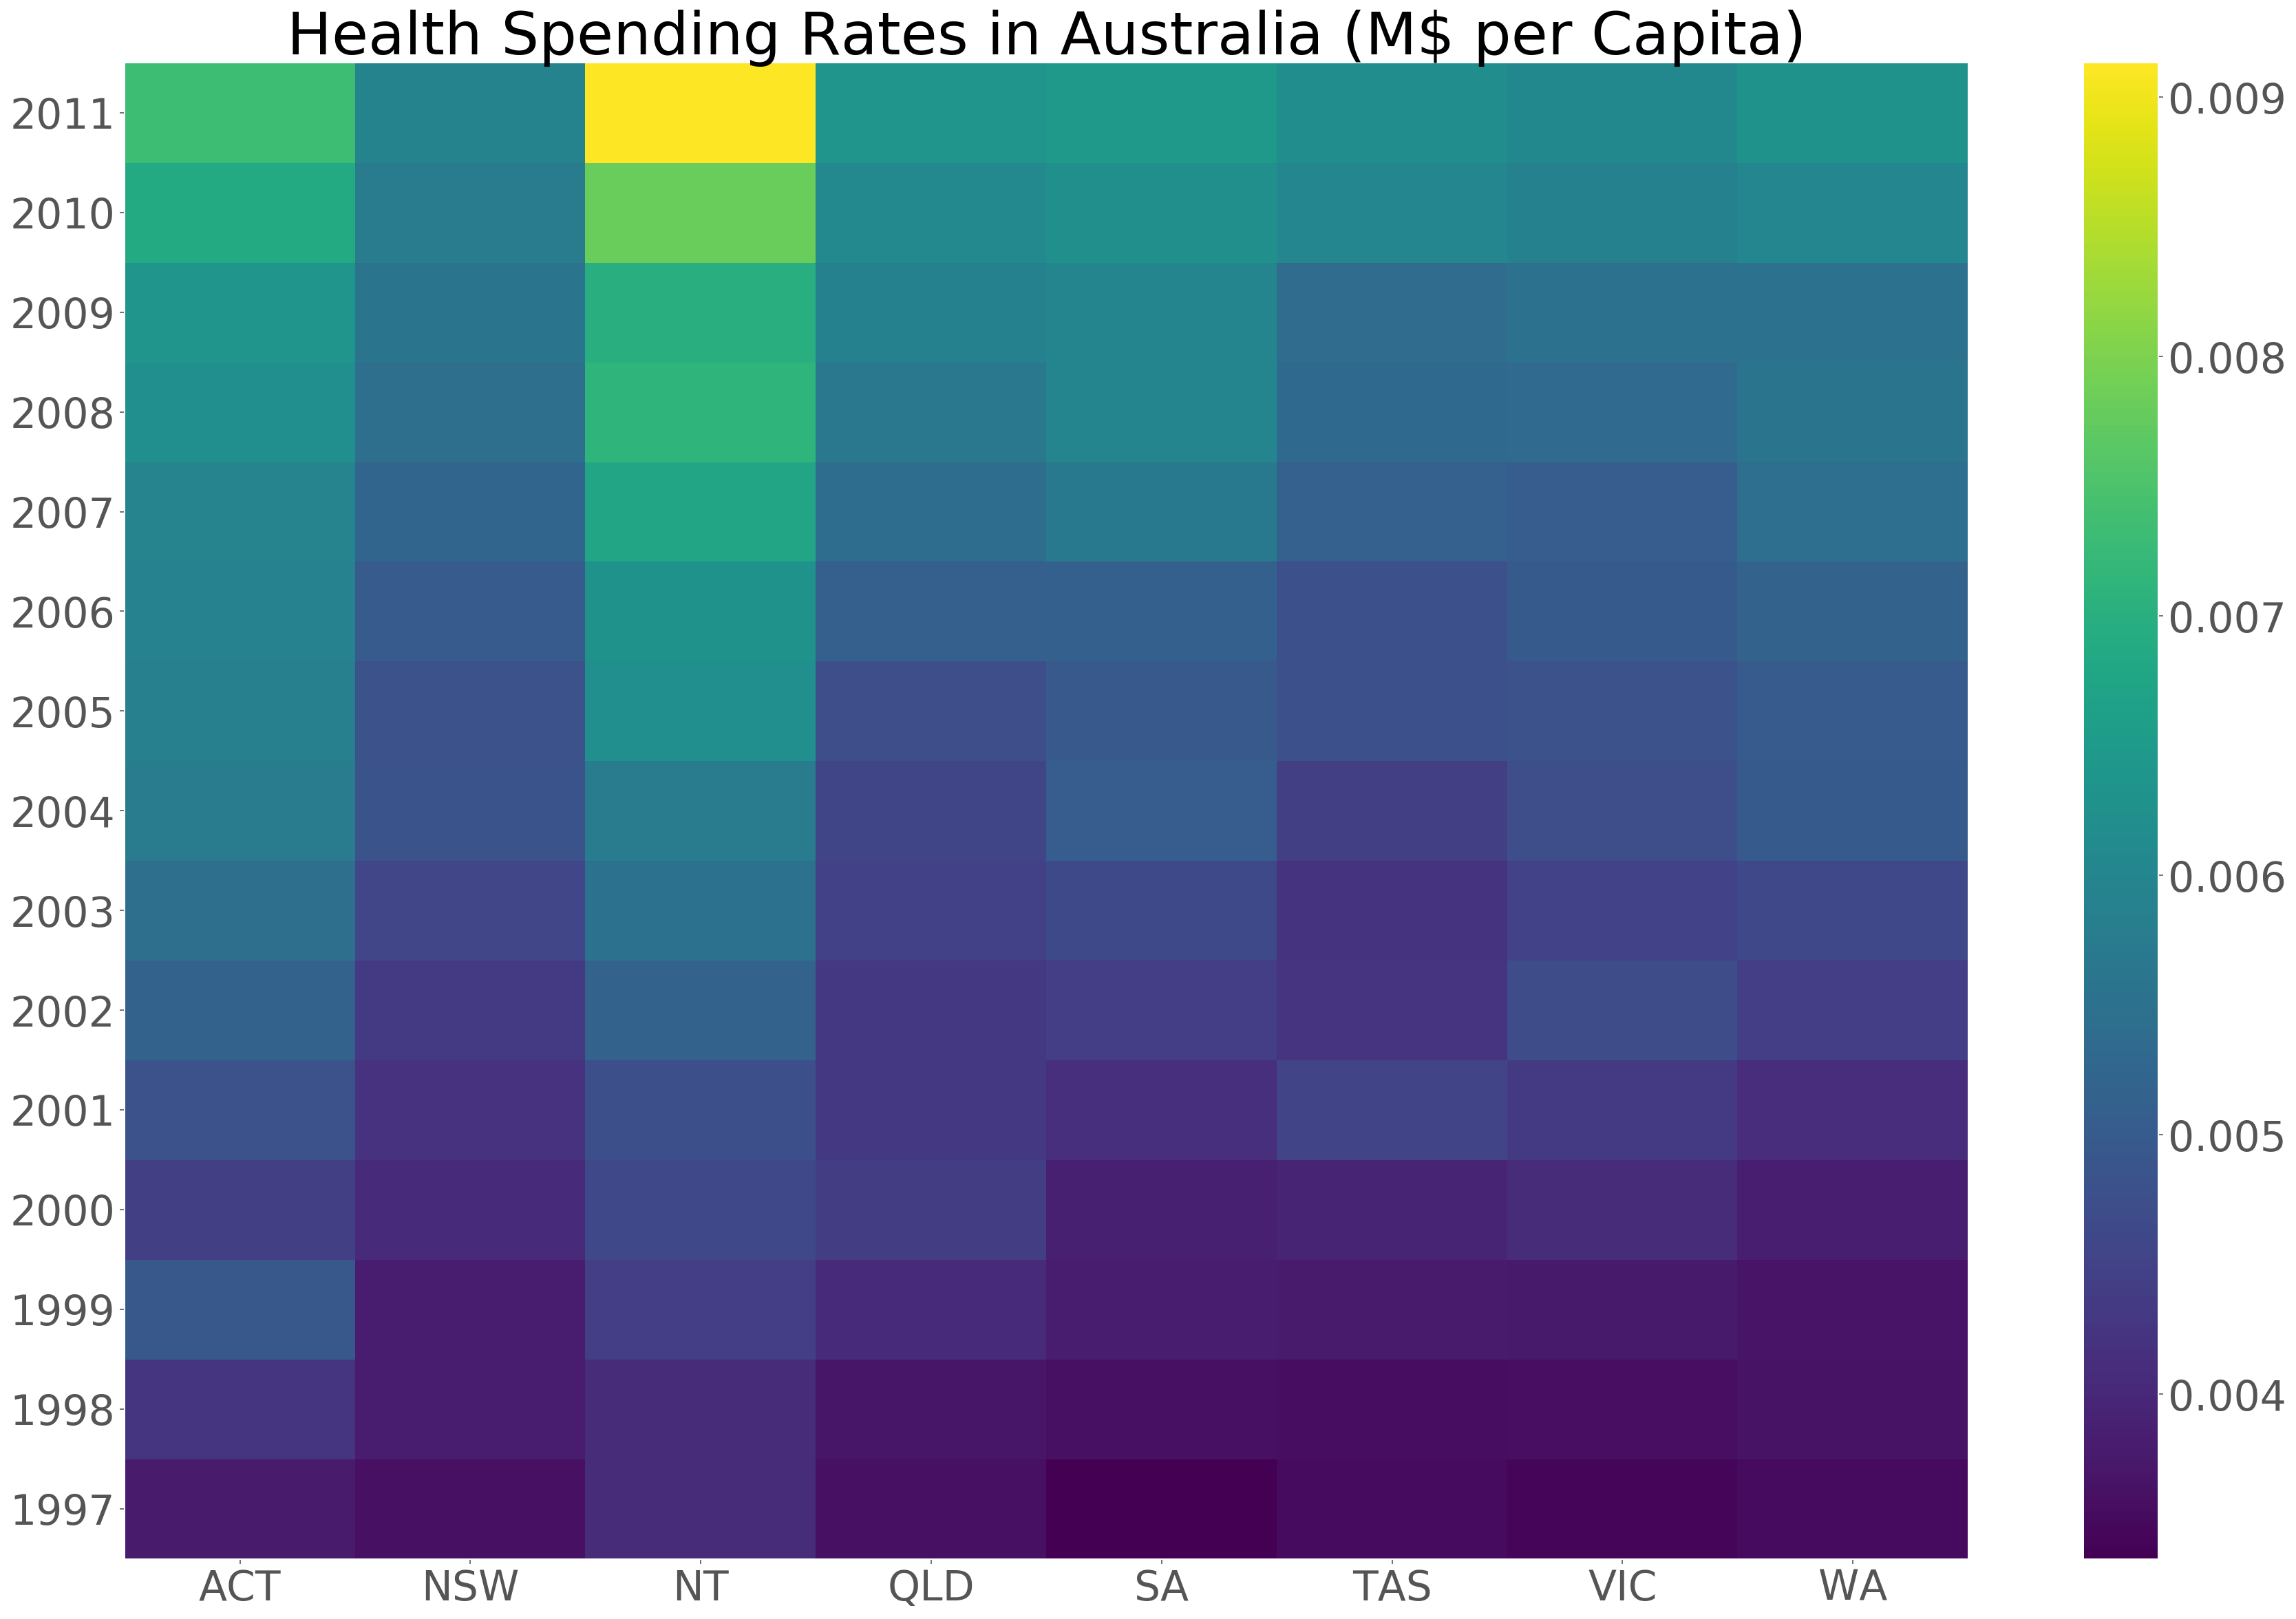

In [27]:
plt.pcolor(hheat_norm)
plt.yticks(np.arange(0.5, len(hyears), 1), [str(d)[:4] for d in hyears])
plt.xticks(np.arange(0.5, len(states), 1), states)
plt.title('Health Spending Rates in Australia (M$ per Capita)')
plt.colorbar()
plt.show()

Again, we see the NT is spending more per person than other states.  One thing to note is that this plot *doesn't* account for inflation.  This explains part of the overall increase over time.  But NT is still much higher, whereas in the past it was more in line with other states.

## Combined Youth Detention and Health Spending

To see how these two datasets interact, we produce a simple scatterplot for each state, covering the four shared years, 2008-2011.  At the risk of saying the same thing over and over, this is just another demonstration that the NT is different from other states.

In [28]:
# aggregate quarterly detention numbers into years
agg_deten = heat_norm[3:-2].reshape((-1,4,8)).sum(axis=1).reshape((-1,8))
# add back in 2008, 3 qrtrs, so x1.33
agg_deten = np.concatenate([heat_norm[:3].sum(axis=0).reshape((1,8))*1.33, agg_deten])
# add back in 2016, 2 qrters, so x2
agg_deten = np.concatenate([heat_norm[-2:].sum(axis=0).reshape((1,8))*2, agg_deten])

In [29]:
dyears = [datetime.datetime(year = y, month=1, day=1) for y in range(2008,2017)]

In [30]:
year_start = 2008
comb_data = list()
for year,(HH,DD) in enumerate(zip(hheat_norm[11:],agg_deten[:4])):
    for st,(h,d) in enumerate(zip(HH,DD)):
        comb_data.append([year_start + year, d, h, states[st]])



In [31]:
combdf = pd.DataFrame.from_records(comb_data,columns=['year','Detention_Rate','Health_Spending_Rate','STATE'])

In [32]:
combdf[combdf['STATE'] == 'NT']

,year,Detention_Rate,Health_Spending_Rate,STATE
2,2008,0.013276,0.007110,NT
10,2009,0.007495,0.007012,NT
18,2010,0.008409,0.007814,NT
26,2011,0.008836,0.009133,NT


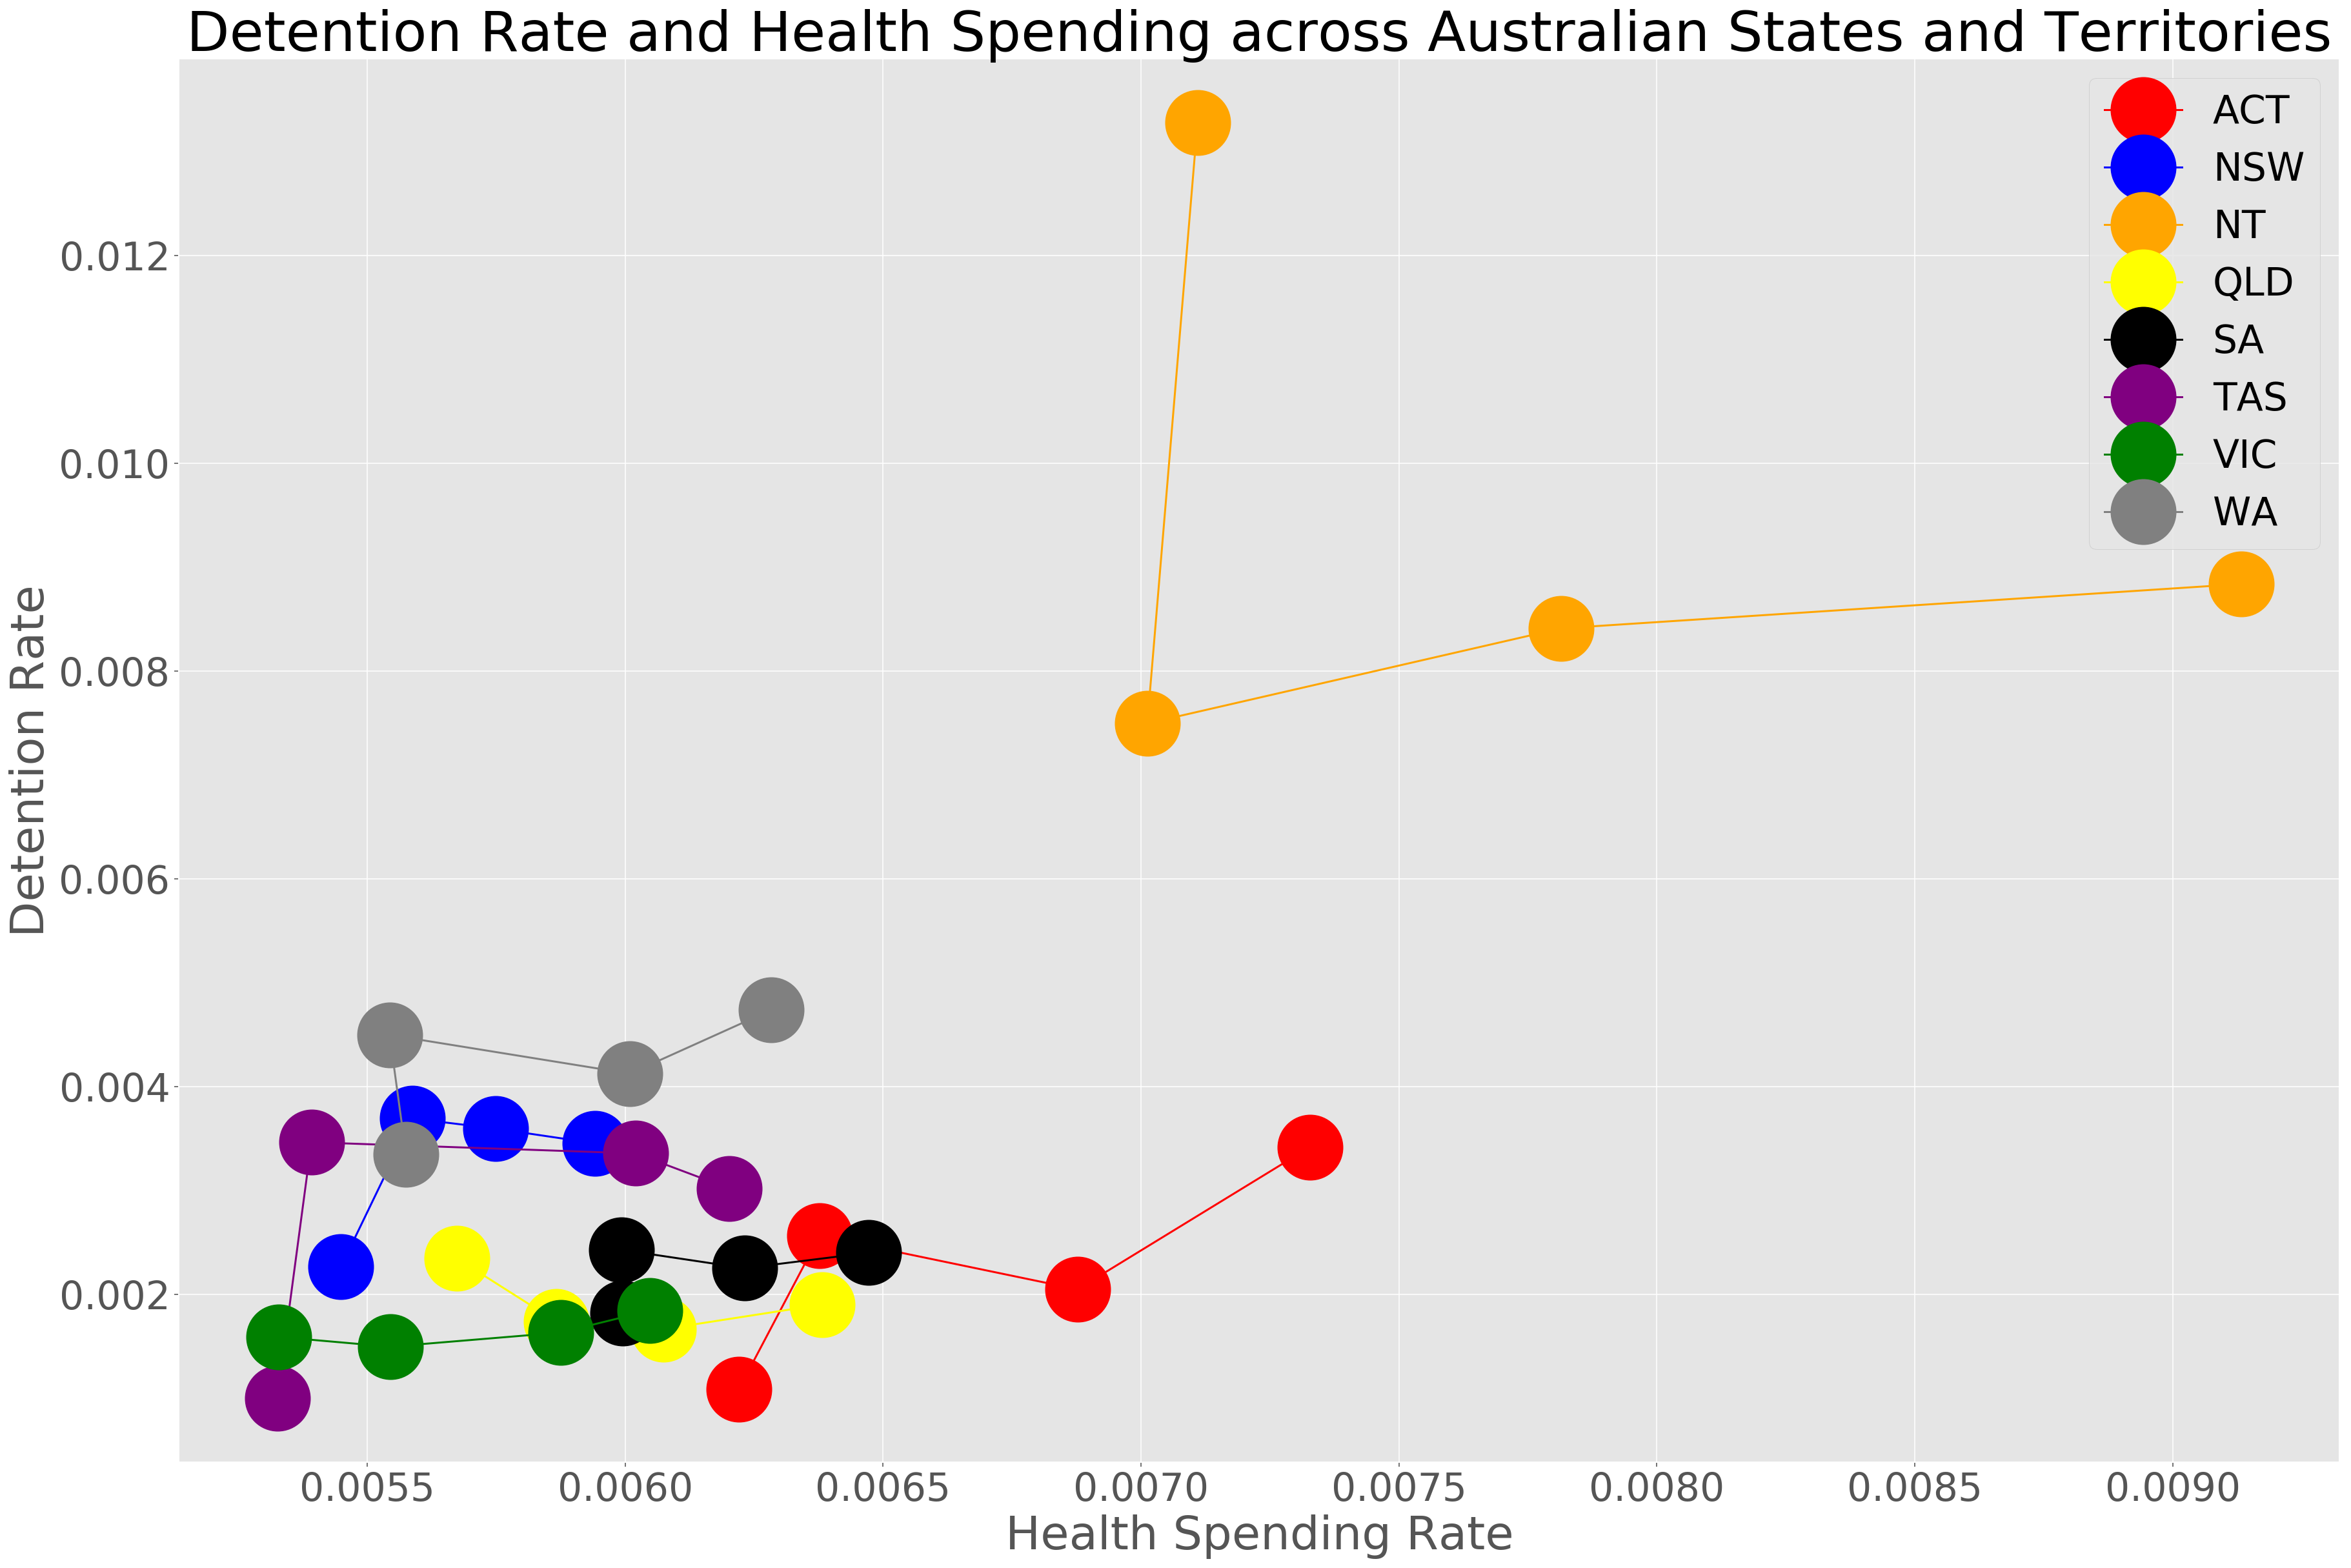

In [33]:
colors = ['red','blue','orange','yellow','black','purple','green','gray']
for i,st in enumerate(states):
    c = combdf[combdf['STATE'] == st]
    plt.plot(c['Health_Spending_Rate'],c['Detention_Rate'],'-o',markersize=50,c=colors[i],label=st)
plt.legend()
plt.ylabel('Detention Rate')
plt.xlabel('Health Spending Rate')
plt.title('Detention Rate and Health Spending across Australian States and Territories')

For every year, we see the NT detains more youths and spends far more in health.  Of note is that this graph makes clear that youth detention actually *declined* from 2008-2009; it is likely that 2008 was an anomaly, but observe that even in this anomaly, the NT is distinct from most other states which faced an increase in the same period.